## How to Build a Quantum Circuit: Demo

Here, we provide an overview of working with Qiskit.  The fundamental package of Qiskit is Terra that provides the basic building blocks necessary to program quantum computers. The fundamental unit of Qiskit is the [quantum circuit](https://en.wikipedia.org/wiki/Quantum_circuit). 

See exercises below based on the circuit demo.

In [15]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend("qasm_simulator")
print("Libraries Loaded Successfully! :)")

Libraries Loaded Successfully! :)


### Building the circuit

The basic element needed for your first program is the QuantumCircuit.  We begin by creating a `QuantumCircuit` comprised of three qubits.

In [16]:
# Create a Quantum Circuit acting on a quantum register of three qubits.
circ = QuantumCircuit(3)

### Add Gates

After you create the circuit with its registers, you can add gates ("operations") to manipulate the registers.

In [17]:
# Add a NOT (X) gate on qubit 0, flipping this quibit's state.
circ.x(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
circ.cx(0, 2)

### Visualize Circuit <a name='visualize'></a>

You can visualize your circuit using Qiskit `QuantumCircuit.draw()`, which plots the circuit in the form found in many textbooks.

In Qiskit, all qubits begin in state |0>. We can show this in the plot by setting the `initial_state` parameter to `True`.

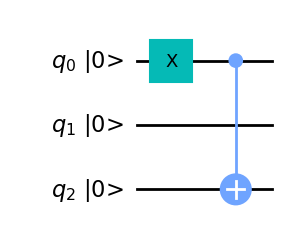

In [18]:
circ.draw('mpl', initial_state=True)

### Measure Circuit

After adding gates, we can add measurement operators to our circuit.

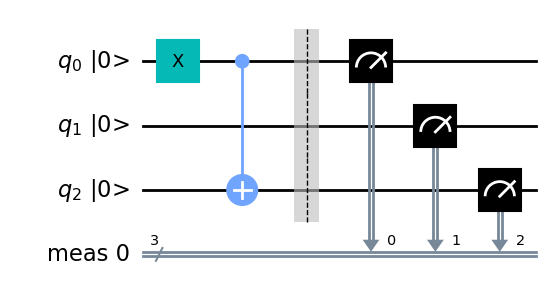

In [19]:
circ.measure_all()
circ.draw('mpl', initial_state=True)

### Extract Probabilities

To try to guess the state of $q_{1}$,$q_{2}$, and $q_{3}$ at the end of a quantum circuit, a quantum computer (or simulator) can count each measurement and calculate the count divided by number of tries to discover the approximate probabilities.

In the following code, we use Qiskit's simulator in the AER module. We set `shots=5000` meaning that the simulator counts the measurement of 5000 simulated circuits in order to provide a probability.

The simulator returns a dictionary where each key is a measurement of the final qubit states, and each value is the number of times that that measurement was observed out of 5000 simulations.

In [20]:
job = execute(circ, backend=simulator, shots=5000)
result = job.result()
counts = result.get_counts()
print(counts)

{'101': 5000}


As we can see, the simulator returned only one measurement value for this circuit, meaning that the probability is 100% that we will observe this final state. 

The final state is represented as 101, which means:

$q_{0}$'s final state = 1
$q_{1}$'s final state = 0
$q_{2}$'s final state = 1

The above measurement result makes sense, as we applied a NOT gate to $q_{0}$, flipping it's state from 0 to 1, and a controlled NOT gate to $q{1}$, filling its state from 0 to 1 iff $q_{0}$ is 1 (which it is).

### Plot The Results

We see below that 5000 out of 5000 simulated measurements resulted in the outcome of `101`. 

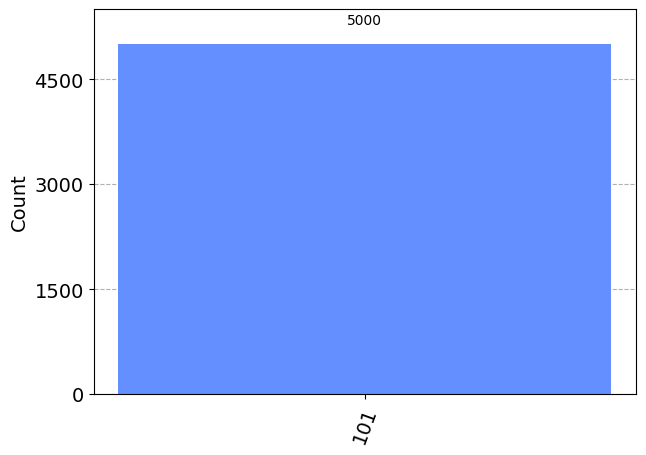

In [ ]:
plot_histogram(counts)

## Exercise 1: Swapping Qubits

Given two qubits, |0⟩ and |0⟩, construct a quantum circuit that results in the state |0⟩|1⟩.

{'01': 5000}


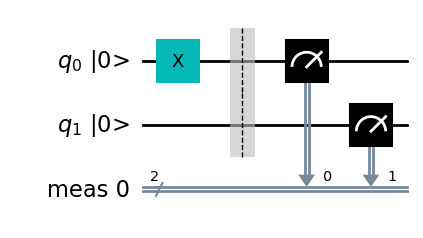

In [38]:
circ_ex1 = QuantumCircuit(2)

# Your code here:
#apply Not gate on the second quibit
circ_ex1.x(0)
circ_ex1.measure_all()

#show example 1 in simulator 
job_ex1 = execute(circ_ex1, backend=simulator, shots=5000)
result_ex1 = job_ex1.result()
counts_ex1 = result_ex1.get_counts()
print(counts_ex1)

# End of your code.

circ_ex1.draw('mpl', initial_state=True)

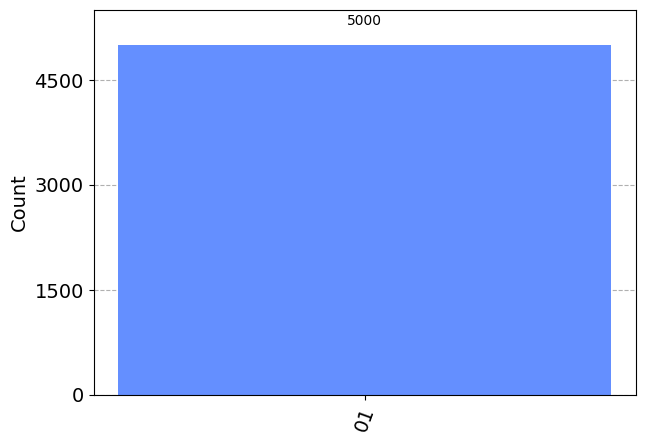

In [39]:
#show plot 
plot_histogram(counts_ex1)

## Exercise 2

Using the methods introduced above, create a quantum circuit that results in a measurement of 011, with 100% probability, using: 
- 3 qubits
- 3 NOT (X) gates
- 1 CNOT gate
- 2500 shots

call your circuit `circ_ex2`.

In [40]:
# Your circuit building code Here:
circ_ex2= QuantumCircuit(3)

#Insert gates into circuit
circ_ex2.x(0) #first NOT gate
circ_ex2.x(2) #second NOT gate
circ_ex2.x(2) #third NOT gate
circ_ex2.cx(0,1) #only CNOT gate
#create measurement operator
circ_ex2.measure_all()


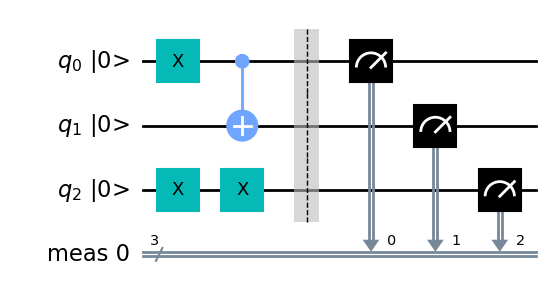

In [41]:
# Your circuit visualizing code here:
circ_ex2.draw('mpl', initial_state=True)

In [42]:
# Your simulation code here:
job_ex2 = execute(circ_ex2, backend=simulator, shots=2500)
result_ex2 = job_ex2.result()
counts_ex2 = result_ex2.get_counts()
print(counts_ex2)

{'011': 2500}


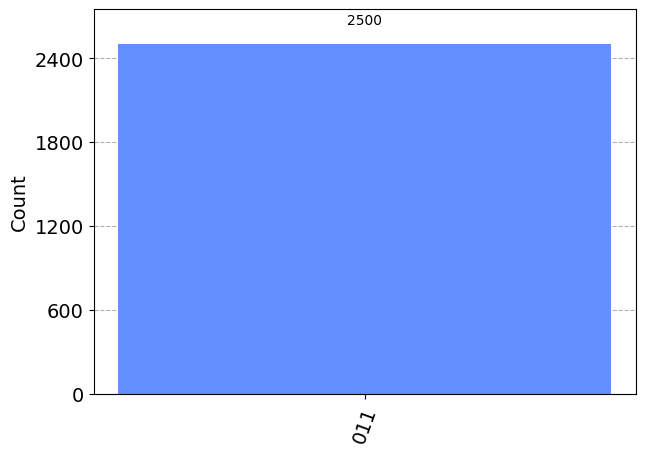

In [44]:
# Your measurement plot code here:
plot_histogram(counts_ex2)

## Exercise 3: Building Bell States

Recall that Bell States are two qubits in maximal quantum entanglement.

The Bell circuit will perform the following transformation:

|0>|0> $\rightarrow \frac{|00>+|11>}{\sqrt{2}}$

We can create Bell states using the simple quantum circuit below.

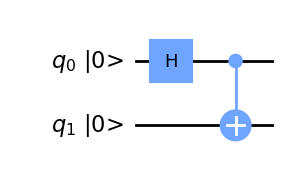

In [45]:
bell_circ = QuantumCircuit(2)

bell_circ.h(0)
bell_circ.cx(0, 1)

bell_circ.draw('mpl', initial_state=True)

To show that $q_{0}$ and $q_{1}$ are maximally entanged after going through the circuit above, we start by measuring them and plotting the probabilities.

{'11 11': 2488, '00 00': 2512}


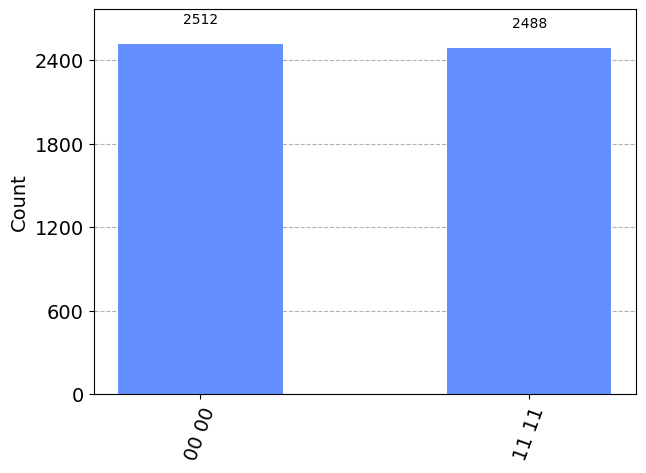

In [48]:
bell_circ.measure_all()
job = execute(bell_circ, backend=simulator, shots=5000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Here, we see that approximately half of the simulated measurements of our Bell circuit resulted in a state of |0>|0>, and half resulted in |1>|1>. This behaviour can be attributed to the qubits being in a superposition between the two possible states. Their entanglement can be observed as the fact that if $q_{0}$ is |0>, $q_{1}$ must also be |0>, and likewise for state |1>.

Seeing how our Bell circuit was able to transform two independent qubits from state |0>|0> to $\frac{|00>+|11>}{\sqrt{2}}$, implement a circuit that first transforms two independent qubits from state |0>|0> to $\frac{|00>+|11>}{\sqrt{2}}$ and then back to |0>|0> (in other words, a circuit that entanges and then unentangles two quibits).

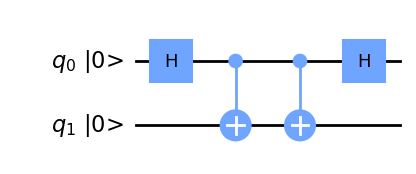

In [52]:
circ_ex3 = QuantumCircuit(2)

#code for entanglement
circ_ex3.h(0)
circ_ex3.cx(0, 1)

# Your code to unentangle q0 and q1 here:

#idea is to essentially apply another NOT gate to make sure that q1 and q0 are always different. But in this case, the NOT gate is intricately applied using CNOT
circ_ex3.cx(0,1)
#reverse effect of transformation h by applying it again on qubit 0.
circ_ex3.h(0)

# End of your code.

circ_ex3.draw('mpl', initial_state=True)

{'00': 5000}


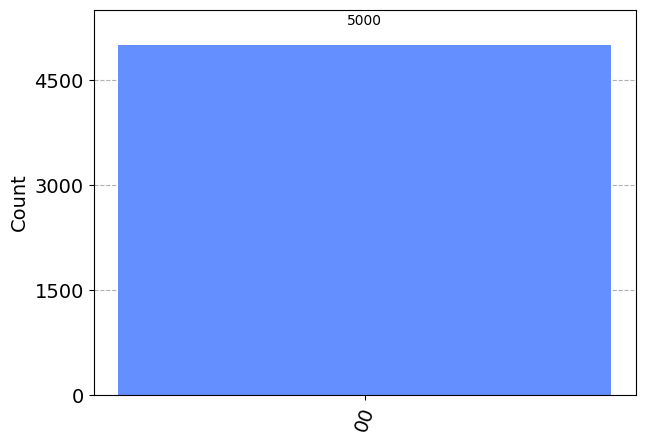

In [53]:
# You may use this to test if your circuit is correct.

circ_ex3.measure_all()
job = execute(circ_ex3, backend=simulator, shots=5000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)